# 題醒

**未處理圖片檔目錄**

    ./Non-processed/

**分割後圖片檔目錄**

    ./Nums/

分割(使用CV)後圖用 `plt` 儲存灰度圖 (14X24) -> (600X400) 

[流程](#流程)

    按造參考資源仿作
    
[整合](#整合後的函數)
    
    仿作後進行整合

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#題醒" data-toc-modified-id="題醒-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>題醒</a></span></li><li><span><a href="#參考來源" data-toc-modified-id="參考來源-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>參考來源</a></span></li><li><span><a href="#流程" data-toc-modified-id="流程-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>流程</a></span><ul class="toc-item"><li><span><a href="#灰度-二值化" data-toc-modified-id="灰度-二值化-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>灰度 二值化</a></span></li><li><span><a href="#團聚分割" data-toc-modified-id="團聚分割-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>團聚分割</a></span></li><li><span><a href="#儲存分割圖片" data-toc-modified-id="儲存分割圖片-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>儲存分割圖片</a></span></li></ul></li><li><span><a href="#其他" data-toc-modified-id="其他-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>其他</a></span><ul class="toc-item"><li><span><a href="#PIL-灰度、二值" data-toc-modified-id="PIL-灰度、二值-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>PIL 灰度、二值</a></span></li></ul></li><li><span><a href="#整合後的函數" data-toc-modified-id="整合後的函數-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>整合後的函數</a></span><ul class="toc-item"><li><span><a href="#輸出到資料夾" data-toc-modified-id="輸出到資料夾-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>輸出到資料夾</a></span></li></ul></li></ul></div>

**login網址**
https://pfcf.lineapia.tw/index.php/zh_TW/app/login

**圖片生成網址**
https://pfcf.lineapia.tw/web/verfiyNumber.php?c=56



In [ ]:

import requests
import numpy as np

# 直接讀網址
res = requests.get('https://pfcf.lineapia.tw/web/verfiyNumber.php?c=56')

# 讀進內存
image = np.asarray(bytearray(res.content), dtype="uint8")

# 用CV讀
imageCV = cv2.imdecode(image, 0)

plt.imshow(imageCV)

In [136]:
import requests

with open('N5.jpg', 'wb') as f:
    res = requests.get('https://pfcf.lineapia.tw/web/verfiyNumber.php?c=56')
    f.write(res.content)

911

In [54]:
import time

def CreatJpg(n=30):
    for i in range(n):
        time.sleep(1)
        with open(f'N{i}.jpg', 'wb') as f:
            res = requests.get('https://pfcf.lineapia.tw/web/verfiyNumber.php?c=56')
            f.write(res.content)
            
            
CreatJpg(n=10)            

验证码识别常规思路是对图像进行处理，将彩色验证码二值化，去除噪点干扰，切割验证码，作为模型进行训练，然后进行测试

http://xia0yu.win/Scikit-learn/23.html
    
图像处理用到PIL库

# 參考來源

[爬蟲實戰] 如何使用機器學習方法破解驗證碼 (2) – 切割出驗證碼中的各個數字

[youtube](https://www.youtube.com/watch?v=dcvTM4O0wiM)

[jupyter](https://nbviewer.jupyter.org/github/ywchiu/largitdata/blob/master/code/Course_92.ipynb)

# 流程

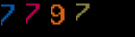

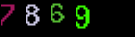

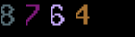

In [18]:
from PIL import Image

Image.open(r'./predict/N3.jpg')#.size
Image.open(r'./predict/N4.jpg')
Image.open(r'./predict/N5.jpg')

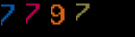

(37, 135, 3)

In [19]:
import numpy as np
pil_image = Image.open(r'./predict/N3.jpg')
pil_image

# image 轉換成數字的陣列
open_cv_image = numpy.array(pil_image) 
open_cv_image.shape

Populating the interactive namespace from numpy and matplotlib


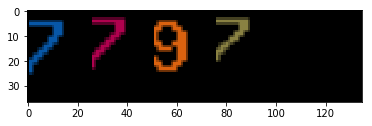

In [38]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

## 灰度 二值化

In [ ]:
import cv2

In [47]:
# 灰度化
#img = cv2.imread(r'./predict/N3.jpg',0)
img = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)

# 過濾 二值化
# 大於10則返回255，否則 0，此數字要調適
# 區分出數字與其他背景的區別
ret, thresh = cv2.threshold(img, 10, 255, 0)


## 團聚分割

In [42]:
# 團聚分割，以像素點的聚集作為依據
# 缺點，驗證碼中的數字，若有重疊，會判斷為一塊(粗糙的做法，直接剖半)
# contours 一連串的點，之後用到
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 依 x 排序各個團聚
# boundingRect，界定出團聚的邊界
# 返回 (x,y,w,h) : x,y座標點， w,h寬高
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
[cv2.boundingRect(c) for c in contours]

[(51, 4, 14, 21),
 (52, 6, 9, 9),
 (1, 4, 14, 22),
 (76, 3, 14, 18),
 (26, 3, 14, 21)]

In [43]:
# 有時切出來的團塊並非完整數字
# 依據 w,h 寬高 判斷

ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print((x,y,w,h))
    #ary.append((x,y,w,h) )
    if w >= 10 and h >= 15 :
        ary.append((x,y,w,h) )

(1, 4, 14, 22)
(26, 3, 14, 21)
(51, 4, 14, 21)
(52, 6, 9, 9)
(76, 3, 14, 18)


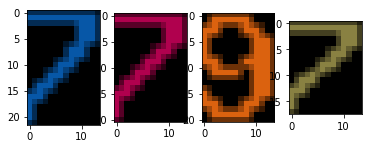

In [52]:
# 透過 matplotlib 合併印出查看

from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)

(37, 135, 3)

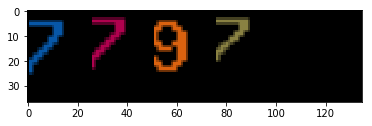

In [49]:
# 可以看出，array 和 plt x,y是倒轉的

open_cv_image.shape
plt.imshow(open_cv_image)

## 儲存分割圖片

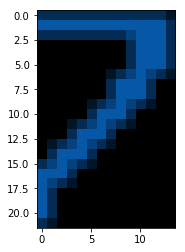

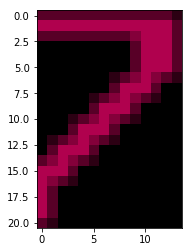

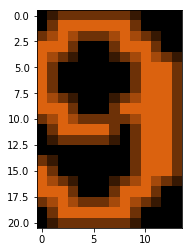

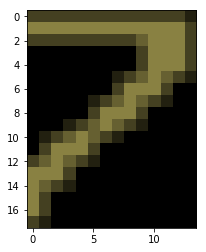

In [53]:
from matplotlib import pyplot as plt

for id, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig(f'1_{id}.jpg', dpi=100)

# 其他
## PIL 灰度、二值

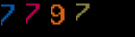

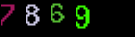

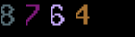

In [199]:
from PIL import Image

Image.open(r'./predict/N3.jpg')#.size
Image.open(r'./predict/N4.jpg')
Image.open(r'./predict/N5.jpg')
im = Image.open(r'./predict/N3.jpg')

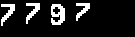

In [82]:
def binarizing(img,threshold):
    """传入image对象进行灰度、二值处理"""
    #.convert('1') 
    # 1 二值化 返回 True Flase 陣列 
    # L 灰度
    # RGB 
    img = img.convert("L") # 转灰度
    pixdata = img.load() # x,y陣列
    w, h = img.size
    # 遍历所有像素，大于阈值的为黑色
    for y in range(h):
        for x in range(w):
            if pixdata[x, y] < threshold:
                pixdata[x, y] = 0
            else:
                pixdata[x, y] = 255
    return img

binim = binarizing(im,10)
binim

In [188]:
# 轉成 np.array 後一樣能 透過 cv 做團塊分割

import numpy as np
np_im = np.array(binim)
np_im.shape

(37, 135)

# 整合後的函數

In [4]:
import cv2
import numpy as np


In [5]:
%pylab inline
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [16]:
def ImgSplitSave(flie_name, save_name):

    # 灰度化
    # 讀進來就是灰度化的數字陣列
    img = cv2.imread(flie_name,0) 
    #imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)

    # 過濾 二值化
    # 大於10則返回255，否則 0，此數字要調適
    # 區分出數字與其他背景的區別
    ret, thresh = cv2.threshold(img, 10, 255, 0)

    # 團聚分割，以像素點的聚集作為依據
    # 缺點，驗證碼中的數字，若有重疊，會判斷為一塊(粗糙的做法，直接剖半)
    # contours 一連串的點，之後用到
    image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # 依 x 排序各個團聚
    # boundingRect，界定出團聚的邊界
    # 返回 (x,y,w,h) : x,y座標點， w,h寬高
    cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

    # 有時切出來的團塊並非完整數字
    # 依據 w,h 寬高 判斷

    ary = []
    for (c,_) in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
        #print((x,y,w,h))
        #ary.append((x,y,w,h) )
        if w >= 10 and h >= 15 :
            ary.append((x,y,w,h) )

    # 儲存圖片 
    # 儲存後大小均為 600X400
    for id, (x,y,w,h) in enumerate(ary):
        fig = plt.figure()
        roi = img[y:y+h, x:x+w]
        thresh = roi.copy()
        plt.imshow(thresh)
        plt.savefig(f'./Nums/{save_name}_{id}.jpg', dpi=100)
        

## 輸出到資料夾

In [6]:
import os

./Non-processed\N10.jpg
N10
(1, 4, 14, 23)
(2, 6, 9, 10)
(26, 4, 14, 22)
(27, 15, 9, 9)
(27, 6, 9, 8)
(51, 4, 14, 22)
(52, 15, 9, 9)
(76, 4, 14, 22)
./Non-processed\N11.jpg
N11
(1, 4, 14, 22)
(26, 4, 14, 22)
(27, 14, 9, 10)
(51, 3, 14, 20)
(76, 3, 14, 21)
./Non-processed\N110.jpg
N110
(1, 3, 14, 21)
(26, 4, 14, 22)
(51, 3, 14, 20)
(52, 5, 9, 8)
(76, 3, 14, 18)
./Non-processed\N111.jpg
N111
(1, 4, 14, 21)
(2, 14, 9, 9)
(2, 6, 9, 7)
(26, 3, 14, 20)
(51, 3, 14, 19)
(52, 12, 9, 8)
(54, 5, 5, 6)
(76, 4, 14, 21)
(77, 14, 9, 9)
(77, 6, 9, 7)
./Non-processed\N112.jpg
N112
(1, 3, 14, 19)
(2, 12, 9, 8)
(26, 4, 14, 24)
(27, 16, 9, 10)
(51, 4, 14, 22)
(52, 6, 9, 10)
(76, 4, 14, 21)
(77, 14, 9, 9)
./Non-processed\N113.jpg
N113
(1, 3, 14, 21)
(26, 4, 14, 21)
(27, 14, 9, 9)
(51, 3, 14, 19)
(76, 4, 14, 23)


D:\anaconda\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


./Non-processed\N114.jpg
N114
(1, 3, 14, 20)
(2, 5, 9, 8)
(26, 3, 14, 20)
(51, 4, 14, 24)
(52, 7, 9, 10)
(76, 3, 14, 21)
./Non-processed\N115.jpg
N115
(1, 3, 14, 19)
(26, 4, 14, 22)
(51, 4, 14, 22)
(76, 4, 14, 21)
(77, 14, 9, 9)
./Non-processed\N116.jpg
N116
(1, 4, 14, 21)
(26, 3, 14, 20)
(27, 12, 9, 9)
(27, 5, 9, 8)
(51, 4, 14, 21)
(52, 14, 9, 9)
(76, 3, 14, 21)
./Non-processed\N117.jpg
N117
(1, 4, 14, 22)
(26, 4, 14, 21)
(27, 14, 9, 9)
(27, 6, 9, 7)
(51, 4, 14, 24)
(52, 16, 9, 10)
(76, 4, 14, 22)
(77, 14, 9, 10)
./Non-processed\N118.jpg
N118
(1, 4, 14, 22)
(2, 14, 9, 10)
(2, 6, 9, 7)
(26, 4, 14, 24)
(27, 16, 9, 10)
(51, 3, 14, 18)
(54, 8, 5, 6)
(76, 4, 14, 24)
./Non-processed\N119.jpg
N119
(1, 4, 14, 22)
(26, 4, 14, 23)
(27, 11, 7, 7)
(51, 3, 14, 20)
(52, 5, 9, 9)
(76, 4, 14, 21)
(77, 10, 7, 7)
./Non-processed\N12.jpg
N12
(1, 3, 14, 21)
(26, 4, 14, 24)
(27, 16, 9, 10)
(27, 7, 9, 8)
(51, 4, 14, 22)
(76, 4, 14, 24)
(77, 16, 9, 10)
./Non-processed\N120.jpg
N120
(1, 4, 14, 21)
(26, 4, 14

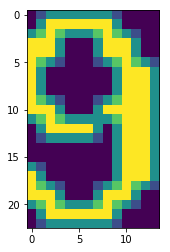

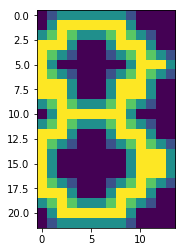

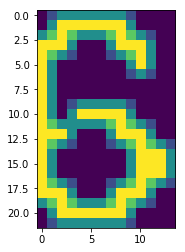

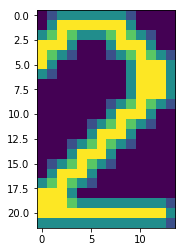

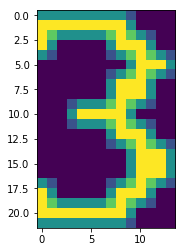

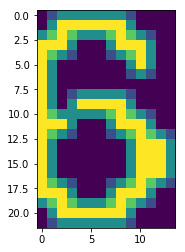

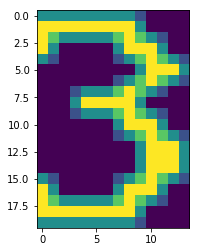

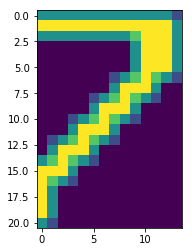

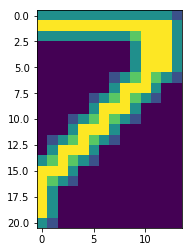

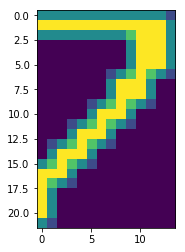

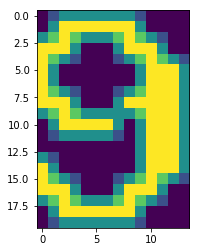

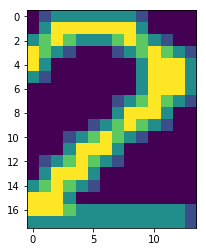

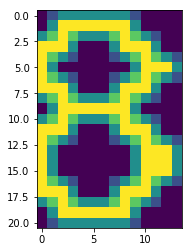

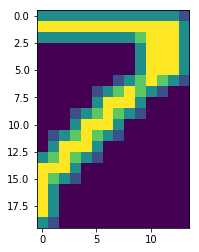

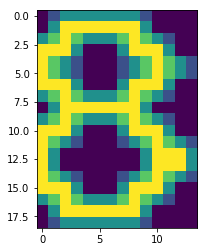

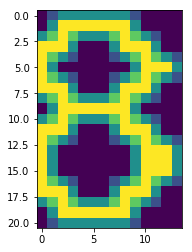

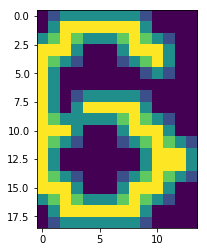

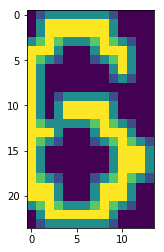

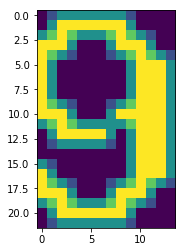

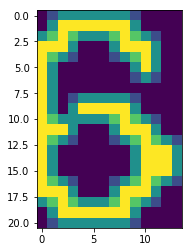

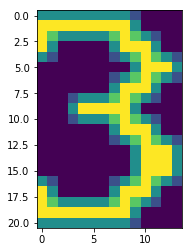

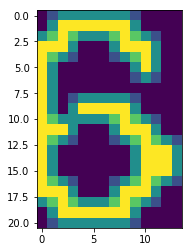

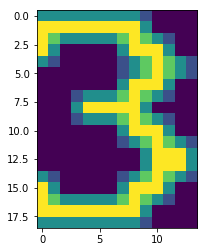

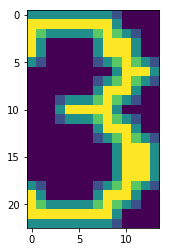

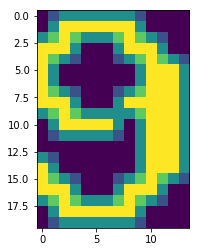

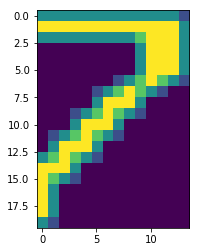

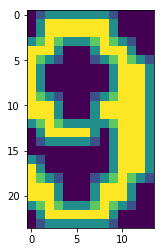

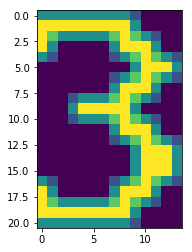

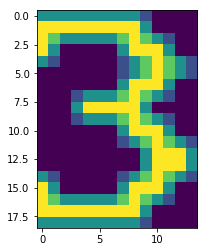

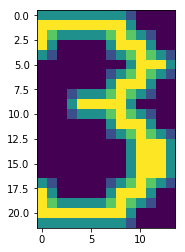

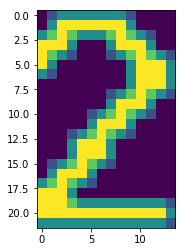

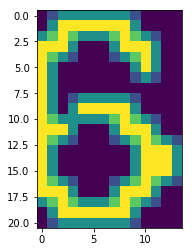

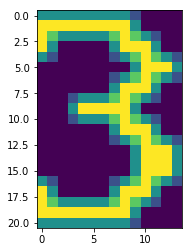

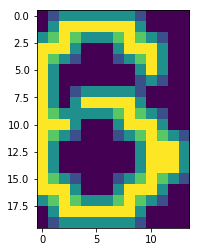

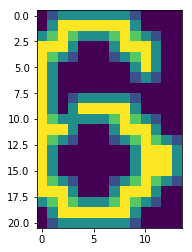

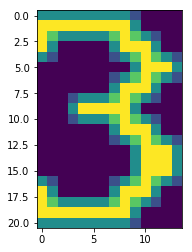

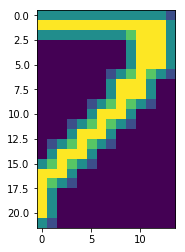

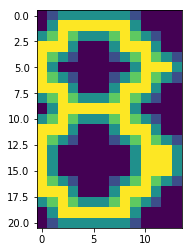

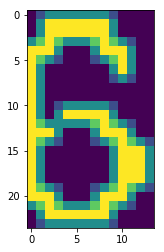

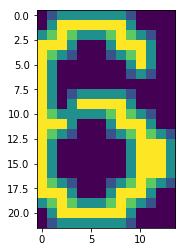

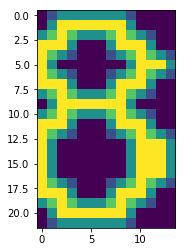

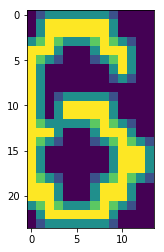

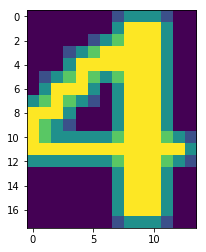

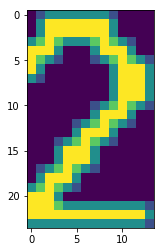

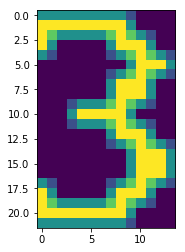

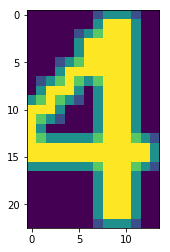

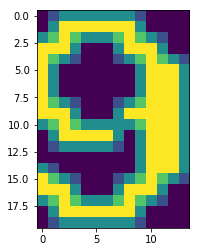

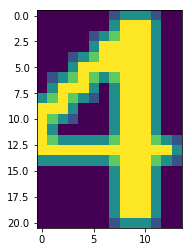

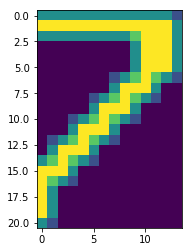

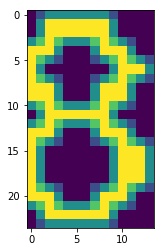

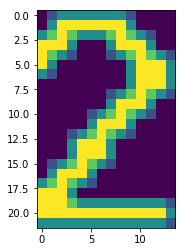

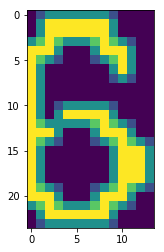

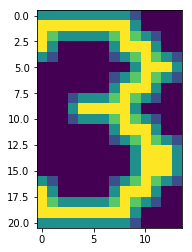

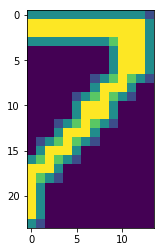

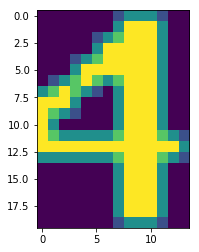

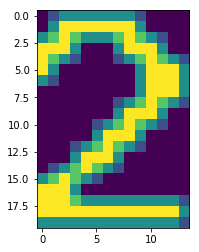

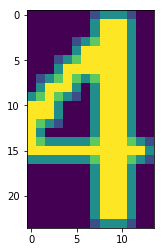

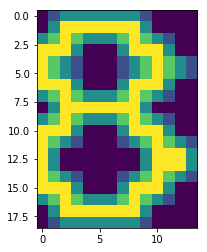

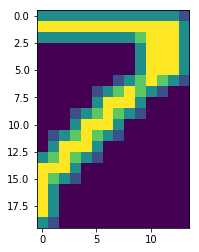

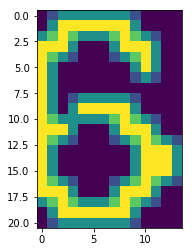

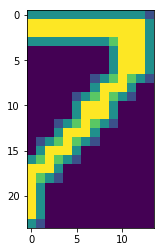

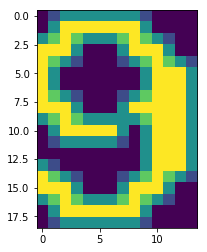

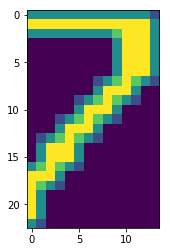

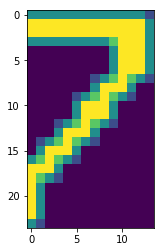

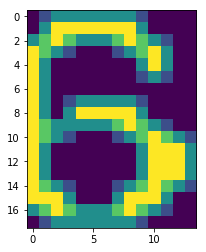

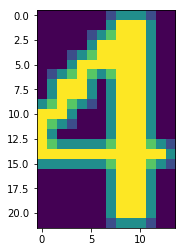

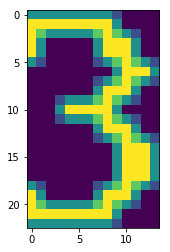

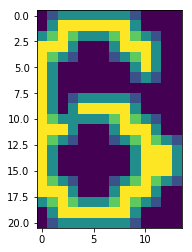

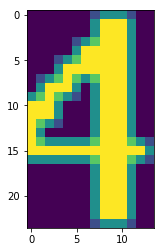

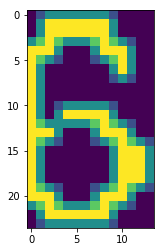

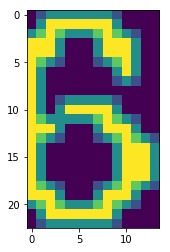

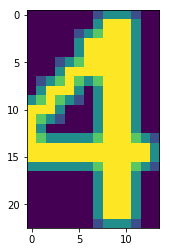

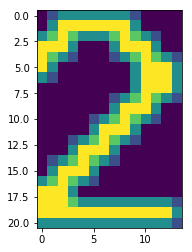

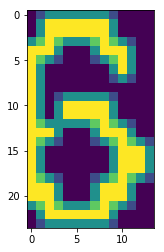

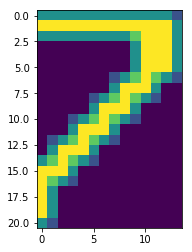

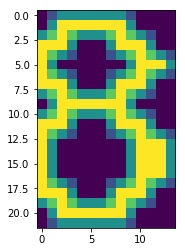

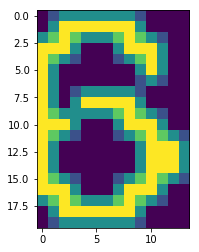

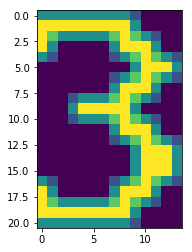

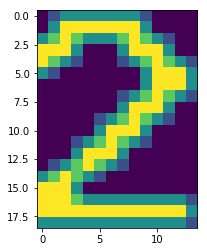

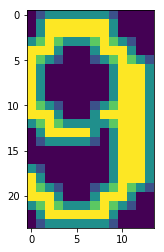

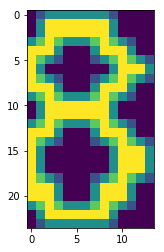

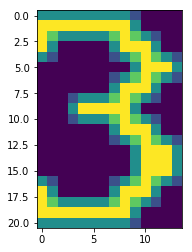

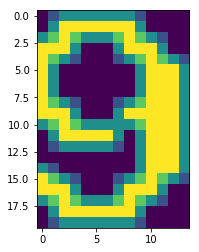

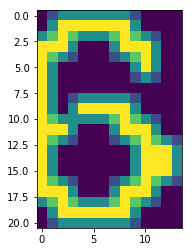

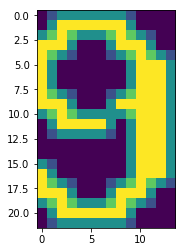

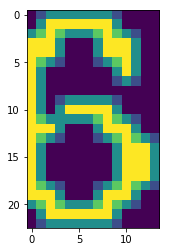

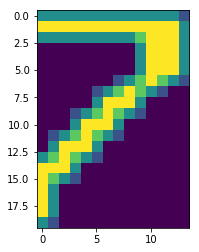

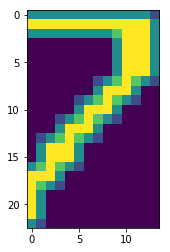

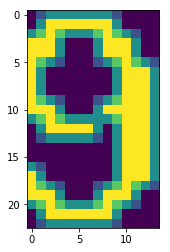

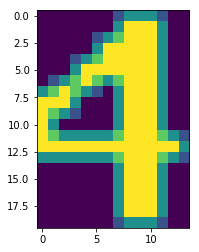

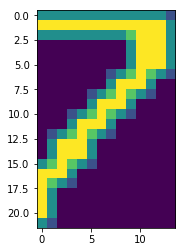

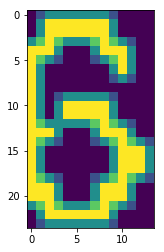

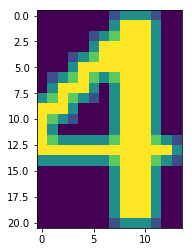

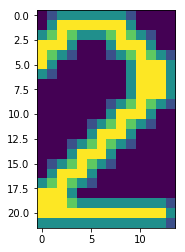

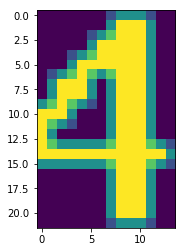

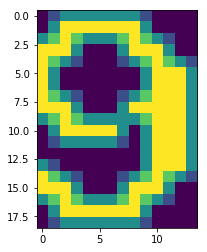

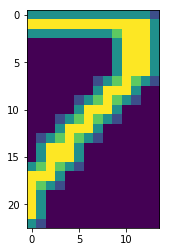

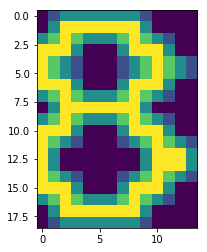

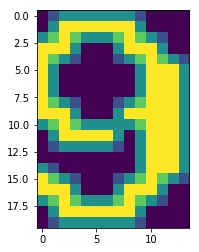

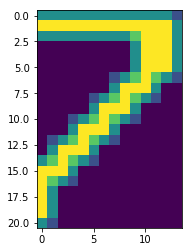

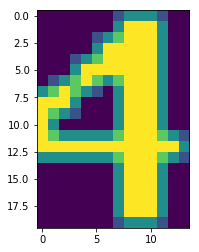

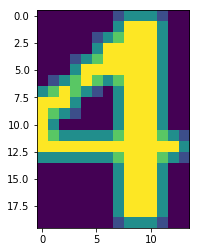

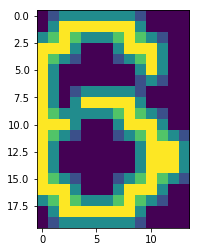

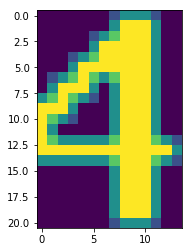

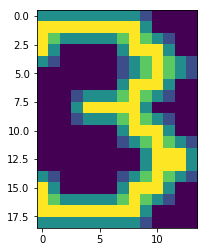

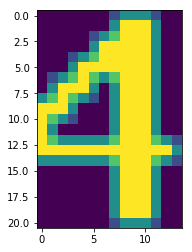

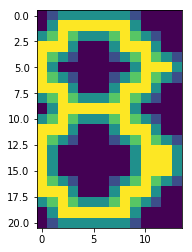

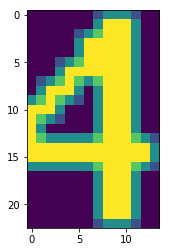

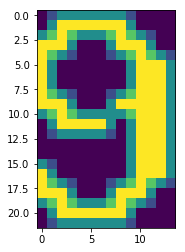

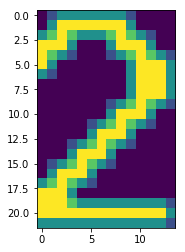

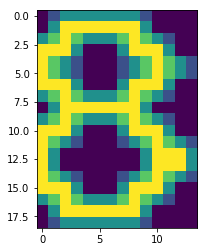

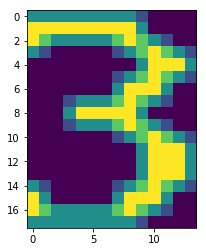

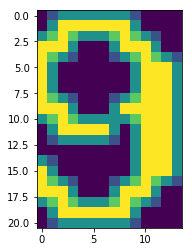

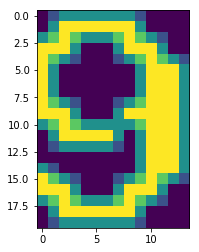

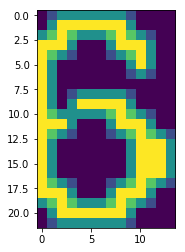

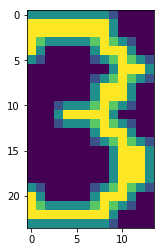

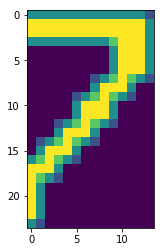

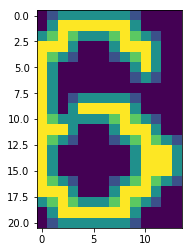

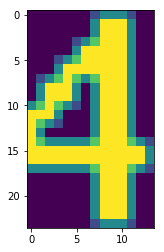

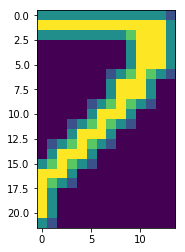

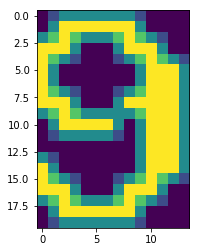

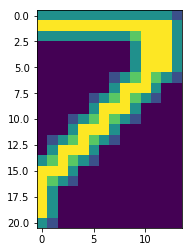

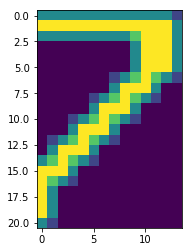

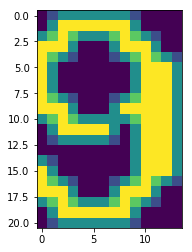

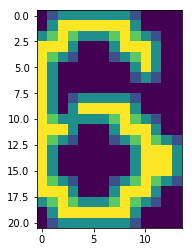

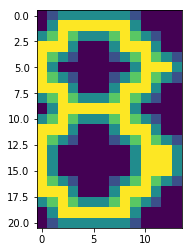

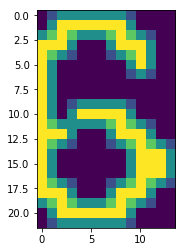

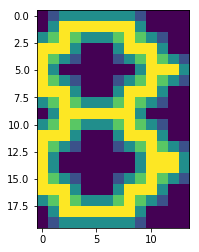

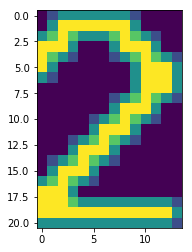

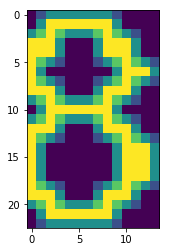

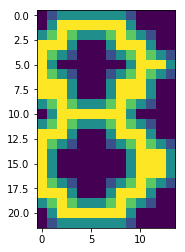

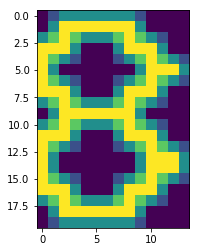

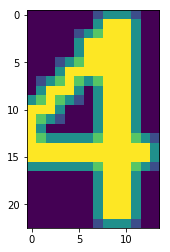

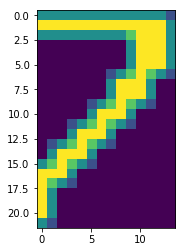

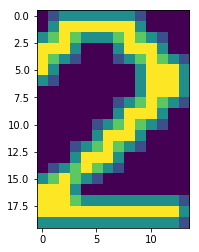

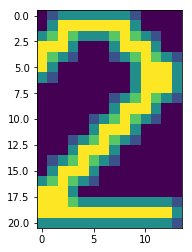

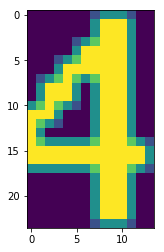

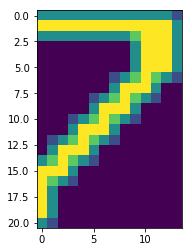

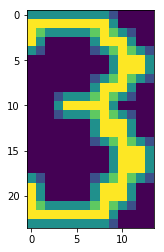

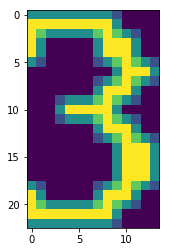

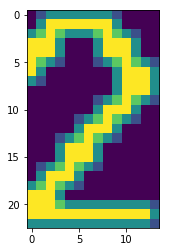

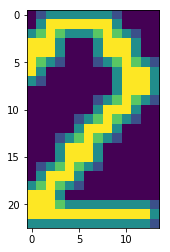

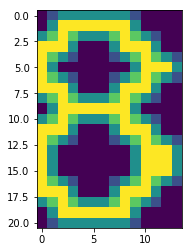

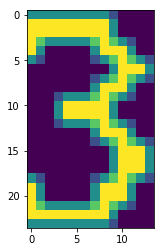

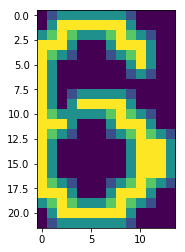

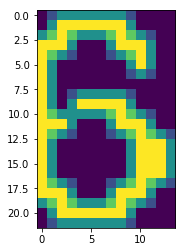

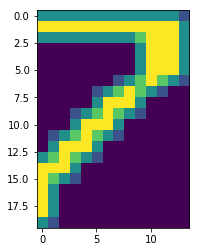

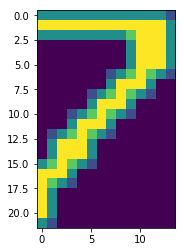

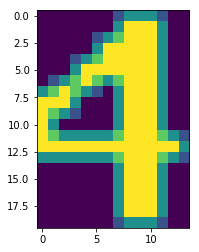

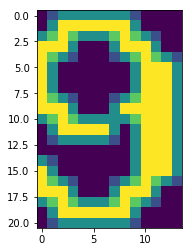

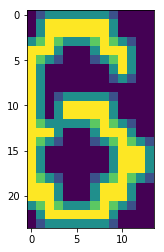

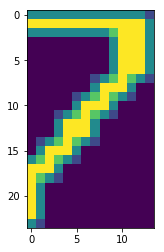

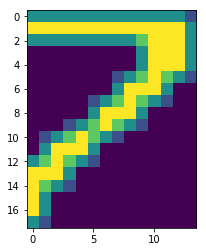

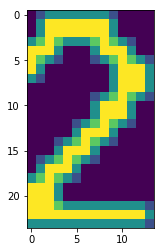

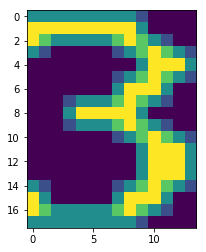

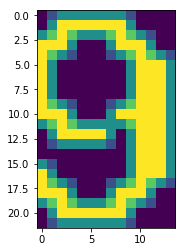

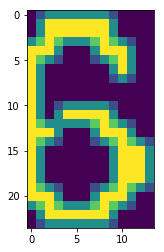

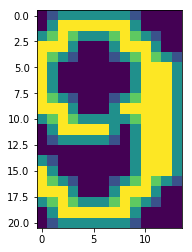

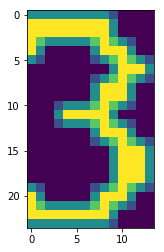

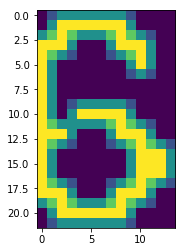

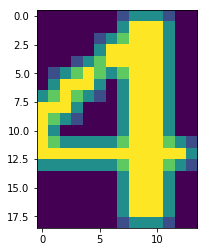

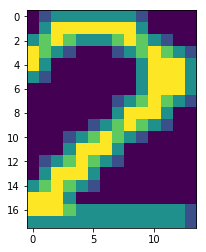

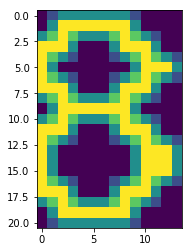

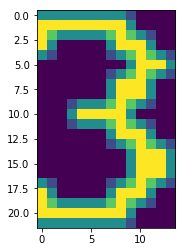

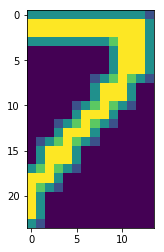

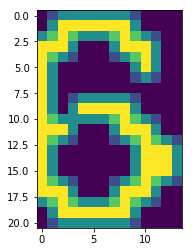

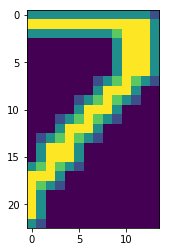

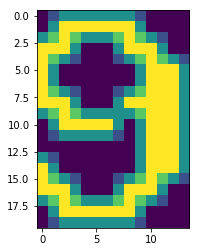

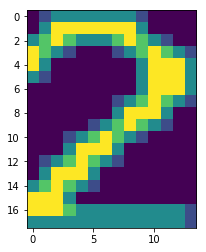

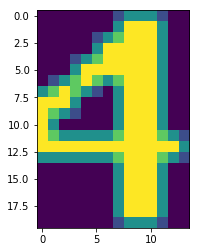

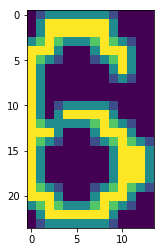

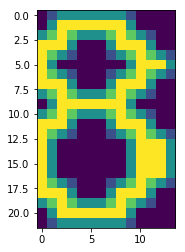

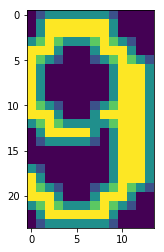

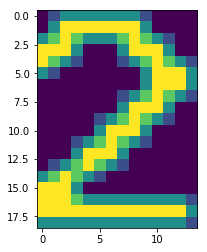

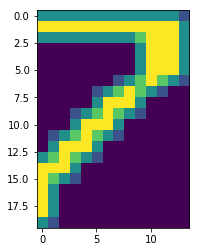

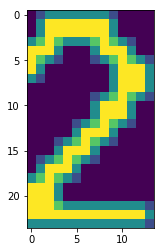

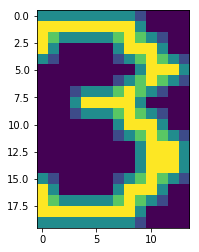

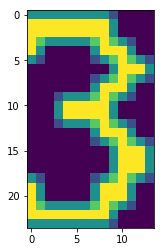

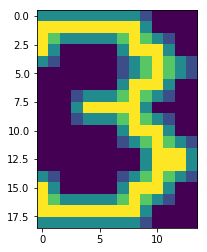

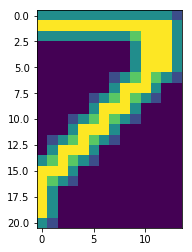

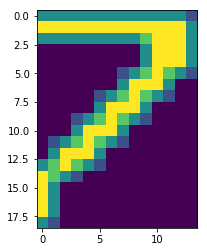

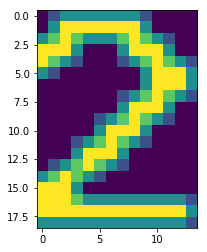

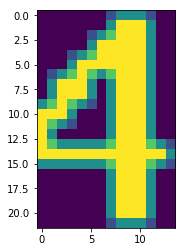

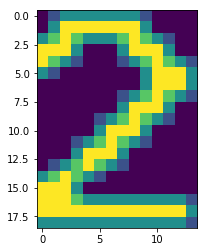

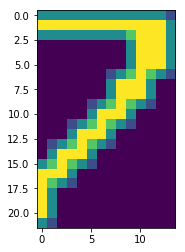

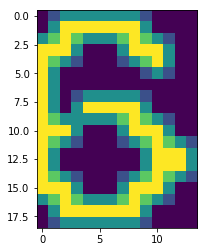

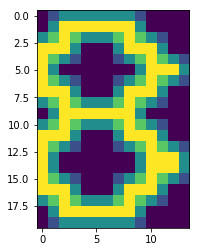

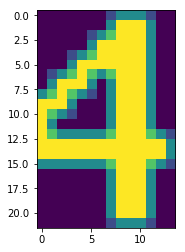

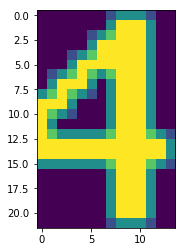

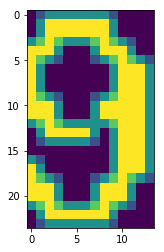

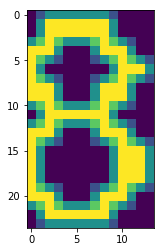

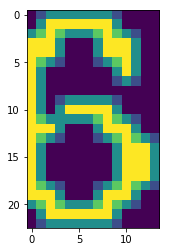

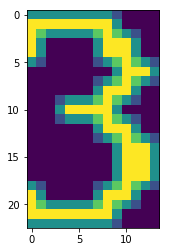

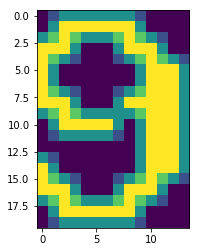

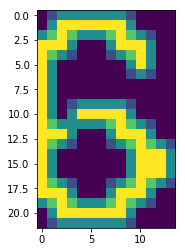

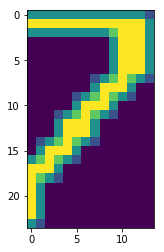

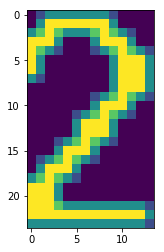

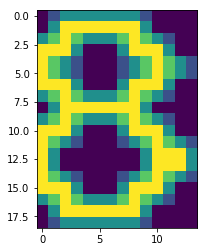

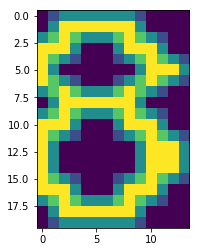

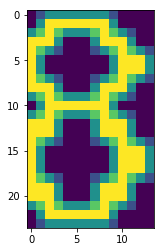

In [15]:
for root, dirs, files in os.walk('./Non-processed'):
    for name in files:
        print(os.path.join(root, name))
        print(name.split('.')[0])
        ImgSplitSave(os.path.join(root, name), name.split('.')[0])